# Functions Concept

https://www.alanzucconi.com/2015/09/30/colour-sorting/

Steps
1. Sort and take position of values
2. Bin the values
3. Within each bin find the mode value and calculate difference of remaining value to the mode 
4. Apply to new value (New Value - Difference) i.e. 0=new value, 1=1+new value, ...
5. Flatten
6. Return to original order (using position values array)


Possible issues:
* When calculating the difference array, some values may be calculated as new values from other bins
    - results in a loss of colours
    - possible solution: return a value between these 2 numbers or half the step value

## Setup

In [27]:
from PIL import ImageColor
import random
import matplotlib.pyplot as plt
import colorsys
import math
import copy
import numpy as np
from scipy import stats

plt.rcParams['figure.figsize'] = [15, 5]

def showImage(image):
    plt.imshow(image)
    plt.show() 

def hexToRGB(hexcode):
    return ImageColor.getcolor(hexcode, "RGB")

def rgbToHex(rgb):
    return '#%02x%02x%02x' % tuple(rgb)

Colour array

In [2]:
random.seed(123)
colours_length = 50
colours = []
for i in range(1, colours_length):
    colours.append (
        [
            random.randint(0, 255),
            random.randint(0, 255),
            random.randint(0, 255)
        ]
    )

new hex values array

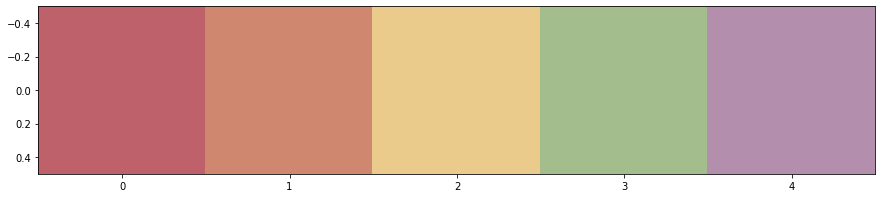

In [3]:
nord_aurora_hex = ["#bf616a", "#d08770", "#ebcb8b", "#a3be8c", "#b48ead"]
nord_aurora_RGB = [hexToRGB(i) for i in nord_aurora_hex]

showImage([nord_aurora_RGB])

## 1.1. Take note of the positions
Make a deep copy to later get the correct ordr

In [4]:
og_colours = copy.deepcopy(colours)

## 1.2. Sort values 

based on https://www.alanzucconi.com/2015/09/30/colour-sorting/

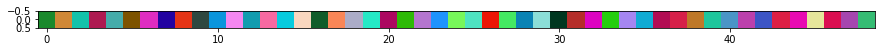

In [5]:
showImage([colours])

In [6]:
def step (r,g,b, repetitions=1):
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )

    h, s, v = colorsys.rgb_to_hsv(r,g,b)

    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)

    if h2 % 2 == 1:
        v2 = repetitions - v2
        lum = repetitions - lum

    return (h2, lum, v2)


OG order


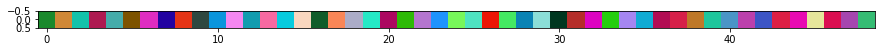

sorted


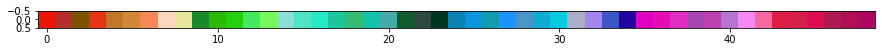

In [7]:
colours.sort(key=lambda rgb: step(rgb[0],rgb[1],rgb[2],8)) 

print("OG order")
showImage([og_colours])
print("sorted")
showImage([colours])


## 2. Bin the values

In [10]:
nThemeColours = len(nord_aurora_RGB)
binnedData = np.array_split(colours, nThemeColours)

### 3.1. Within each bin find the mode value 

In [33]:
#for i in binnedData:
print(binnedData[0][0])
#stats.mode(binnedData[0])

hexBinnedData = [rgbToHex(i) for i in binnedData[0]]
hexMode, hexModeCount = stats.mode(hexBinnedData)

print(hexMode)
print(hexModeCount)

[236  22   5]
['#1a892c']
[1]


### 3.2 and calculate difference of remaining value to the mode 